In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import category_encoders as ce

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc

%matplotlib inline
%store -r X_train
%store -r y_train
%store -r X_test
%store -r y_test

In [48]:
le = LabelEncoder()
ohe = OneHotEncoder()
classifier = DecisionTreeClassifier(random_state=10)  

In [49]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117697 entries, 126620 to 248657
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Camis                 117697 non-null  object 
 1   Dba                   117697 non-null  object 
 2   Boro                  117697 non-null  object 
 3   Zipcode               117697 non-null  object 
 4   Cuisine               117697 non-null  object 
 5   InspectionDate        117697 non-null  object 
 6   Action                117697 non-null  object 
 7   ViolationCode         117697 non-null  object 
 8   ViolationDescription  117697 non-null  object 
 9   Grade                 117697 non-null  object 
 10  InspectionType        117697 non-null  object 
 11  Latitude              117697 non-null  float64
 12  Longitude             117697 non-null  float64
 13  CouncilDistrict       117697 non-null  float64
 14  InspectionYear        117697 non-null  object 


In [50]:
X_train = X_train.drop(columns=['Latitude', 'Longitude', 'ViolationDescription', 'ViolationCode', 'Camis', 'Dba',
                               'Zipcode', 'InspectionDate', 'InspectionYear'])
X_test = X_test.drop(columns=['Latitude', 'Longitude', 'ViolationDescription', 'ViolationCode', 'Camis', 'Dba', 
                             'Zipcode', 'InspectionDate', 'InspectionYear'])

In [51]:
#label encoding
y_train_le = le.fit_transform(y_train)
y_test_le = le.fit_transform(y_test)

In [52]:
#one hot encoding
ohe = ce.OneHotEncoder(handle_unknown='ignore', use_cat_names=True)
X_train_ohe = ohe.fit_transform(X_train)
X_train_ohe.head()

/home/user/anaconda3/envs/flatiron/lib/python3.6/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,Boro_Brooklyn,Boro_Manhattan,Boro_Bronx,Boro_Queens,Boro_Staten Island,Cuisine_Mediterranean,Cuisine_American,Cuisine_Latin/Caribbean,Cuisine_Asian,Cuisine_Specialty,...,Grade_C,InspectionType_Cycle Inspection / Initial Inspection,InspectionType_Cycle Inspection / Re-inspection,InspectionType_Pre-permit (Operational) / Initial Inspection,InspectionType_Pre-permit (Operational) / Re-inspection,InspectionType_Pre-permit (Operational) / Reopening Inspection,InspectionType_Cycle Inspection / Reopening Inspection,InspectionType_Pre-permit (Non-operational),CouncilDistrict,IsChain
126620,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,33.0,False
14307,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,2.0,False
286220,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,33.0,False
374436,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,12.0,False
47465,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,41.0,False


In [53]:
X_test_ohe = ohe.fit_transform(X_test)
X_test_ohe.head()

/home/user/anaconda3/envs/flatiron/lib/python3.6/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,Boro_Brooklyn,Boro_Bronx,Boro_Manhattan,Boro_Queens,Boro_Staten Island,Cuisine_Pizza,Cuisine_American,Cuisine_Italian,Cuisine_International,Cuisine_Latin/Caribbean,...,Grade_C,InspectionType_Cycle Inspection / Initial Inspection,InspectionType_Cycle Inspection / Re-inspection,InspectionType_Pre-permit (Operational) / Reopening Inspection,InspectionType_Pre-permit (Operational) / Initial Inspection,InspectionType_Cycle Inspection / Reopening Inspection,InspectionType_Pre-permit (Operational) / Re-inspection,InspectionType_Pre-permit (Non-operational),CouncilDistrict,IsChain
234299,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,38.0,True
309886,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,13.0,True
256582,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,35.0,False
66275,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,35.0,False
121712,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,2.0,False


In [68]:
#selectkbest
selector = SelectKBest(score_func=f_classif, k=10)

X_k_best_train = selector.fit_transform(X_train_ohe, y_train_le)
X_k_best_test= selector.transform(X_test_ohe)

In [69]:
#model
classifier.fit(X_k_best_train, y_train_le)

DecisionTreeClassifier(random_state=10)

In [70]:
# Make predictions for test data
y_pred = classifier.predict(X_k_best_test) 

In [88]:
# Calculate accuracy 
acc = accuracy_score(y_test_le,y_pred)
print('Accuracy is :{0}'.format(acc))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_le, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))


Accuracy is :0.5586822150003186

AUC is :0.56


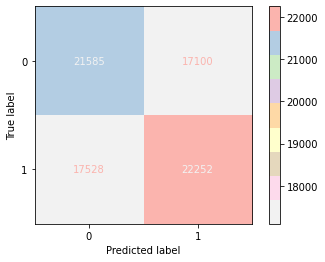

In [77]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(classifier, X_k_best_test, y_test_le, cmap=plt.cm.Pastel1_r)
plt.show()

In [87]:
# Plot and show decision tree
plt.figure(figsize=(20,20), dpi=800)
tree.plot_tree(classifier, 
               feature_names=X_train_ohe.columns,
               class_names=np.unique(y_pred).astype('str'),
               filled=True, rounded=True)
plt.show()